In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:

# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking if there is any null data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#statistical information
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation

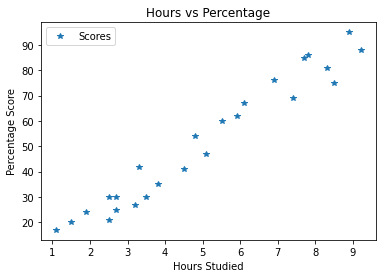

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

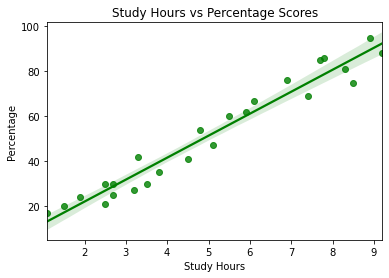

In [6]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data ,color='green')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score

# Data Preprocessing

In [7]:
X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

In [8]:
#Splitting this data into training and test sets.

# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Model trained successfully")

Model trained successfully


In [9]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("X test.shape  =", X_test.shape)
print("Y train.shape =" ,y_train.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
X test.shape  = (5, 1)
Y train.shape = (20,)
Y test.shape  = (5,)


# Training the model

In [10]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [11]:
##Fitting Training Data
linreg.fit(X_train,y_train)
print("Model Training is done")

Model Training is done


In [12]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.826892353899737 
B1 = [9.68207815]


In [13]:
##plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

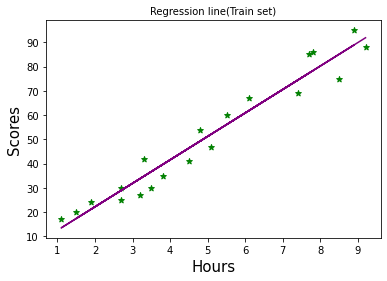

In [14]:
##plotting on train data aka regression line
plt.scatter(X_train,y_train,color='green',marker='*')
plt.plot(X_train,Y0,color='purple')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# Making Predictions

In [15]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = linreg.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [16]:
#Comparing Actual result to the Predicted Model result
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [17]:
#Estimating training and test score
print("Training Score:",linreg.score(X_train,y_train))
print("Test Score:",linreg.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


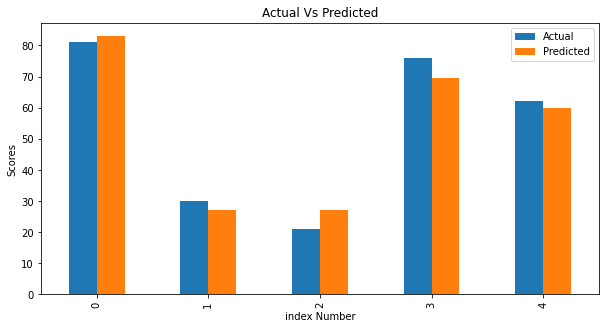

In [18]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(10,5))
plt.grid(which='minor', linewidth='0.5', color='g')
plt.grid(which='major', linewidth='0.5', color='r')
plt.grid(False)
plt.ylabel("Scores")
plt.xlabel("index Number")
plt.title("Actual Vs Predicted")
plt.show()

In [19]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linreg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))
linreg.get_params()
#R-2 is the model fit value here or the model accuracy.

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Conclusion

From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS